# KMeans v3
v3 uses the dataframe without key, time signature, popularity, explicit, duration_ms, tempo, speechiness

In [15]:
import functions as f
from IPython.display import IFrame
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

## Import data

In [2]:
df = pd.read_csv("data/clean_audio_features_dataset_curated.csv")

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,0,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,-18.515,...,0,0,0,0,0,0,0,1,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,0,1
34707,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,0,1,0
34708,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,0,1,0
34709,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,-10.889,...,0,1,0,0,0,0,0,0,1,0


In [4]:
df_model = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name']).copy()

In [5]:
df_model.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'key_0', 'key_1', 'key_2', 'key_3',
       'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10',
       'key_11', 'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5'],
      dtype='object')

In [6]:
df_model = df_model[['danceability', 
    'energy', 
    'loudness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence']]
df_model

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence
0,0.676,0.4610,-6.746,0.0322,0.000001,0.3580,0.7150
1,0.420,0.1660,-17.235,0.9240,0.000006,0.1010,0.2670
2,0.438,0.3590,-9.734,0.2100,0.000000,0.1170,0.1200
3,0.266,0.0596,-18.515,0.9050,0.000071,0.1320,0.1430
4,0.618,0.4430,-9.681,0.4690,0.000000,0.0829,0.1670
...,...,...,...,...,...,...,...
34706,0.172,0.2350,-16.393,0.6400,0.928000,0.0863,0.0339
34707,0.174,0.1170,-18.318,0.9940,0.976000,0.1050,0.0350
34708,0.629,0.3290,-10.895,0.8670,0.000000,0.0839,0.7430
34709,0.587,0.5060,-10.889,0.3810,0.000000,0.2700,0.4130


## Scaler

In [7]:
minmax = MinMaxScaler()

In [8]:
minmax.fit(df_model)
X_scaled = minmax.transform(df_model)

In [9]:
X_scaled

array([[6.74469243e-01, 4.60961944e-01, 8.09045114e-01, ...,
        1.01101101e-06, 3.53750483e-01, 7.18592965e-01],
       [3.95753947e-01, 1.65941115e-01, 5.75249643e-01, ...,
        5.56556557e-06, 9.26087752e-02, 2.68341709e-01],
       [4.15351116e-01, 3.58954742e-01, 7.42443830e-01, ...,
        0.00000000e+00, 1.08866625e-01, 1.20603015e-01],
       ...,
       [6.23298857e-01, 3.28952624e-01, 7.16565621e-01, ...,
        0.00000000e+00, 7.52331985e-02, 7.46733668e-01],
       [5.77572128e-01, 5.05965121e-01, 7.16699358e-01, ...,
        0.00000000e+00, 2.64332310e-01, 4.15075377e-01],
       [5.11159499e-01, 4.86963780e-01, 7.31967725e-01, ...,
        0.00000000e+00, 8.07202227e-02, 7.11557789e-01]])

## KMeans model metrics

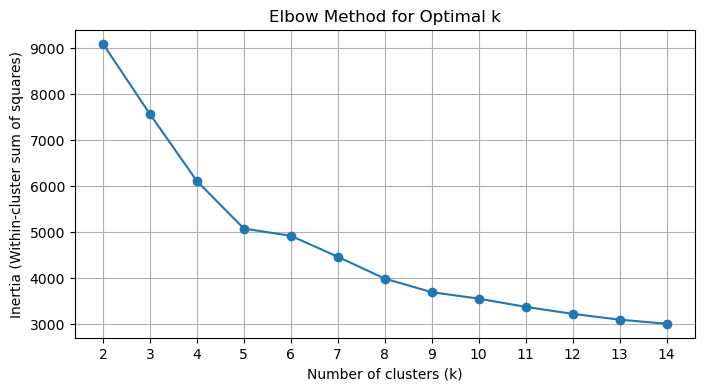

In [138]:
inertias = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

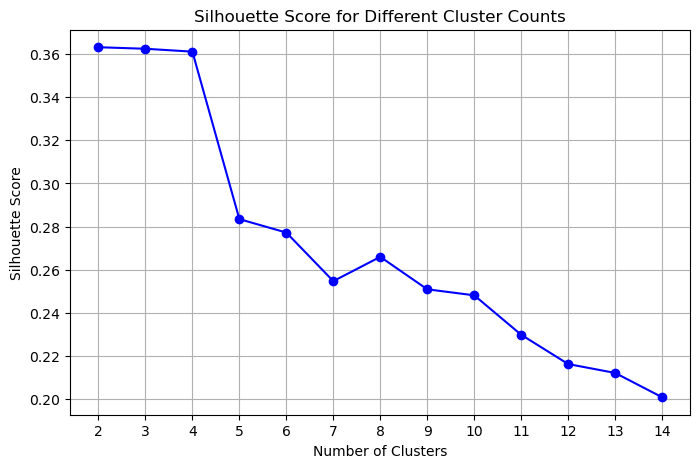

In [18]:
cluster_range = range(2, 15)
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Cluster Counts")
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

## Model training n_clusters = 8

In [19]:
kmeans = KMeans(n_clusters=8, random_state=42)

In [20]:
kmeans.fit(X_scaled)

KMeans(random_state=42)

### Model prediction

In [21]:
df_kmeans_v3_8 = pd.read_csv("data/clean_audio_features_dataset_curated.csv")
df_kmeans_v3_8 = df_kmeans_v3_8.drop(columns=['Unnamed: 0'])
df_kmeans_v3_8['cluster'] = kmeans.predict(X_scaled)

In [22]:
df_kmeans_v3_8['cluster'].value_counts()

cluster
4    9242
7    8871
2    4991
5    4699
3    2500
0    1762
1    1425
6    1221
Name: count, dtype: int64

### Check clusters

In [23]:
df_kmeans_v3_8[['danceability', 
    'energy', 
    'loudness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'cluster']].select_dtypes('number').groupby('cluster').mean()

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence
cluster,,,,,,,
0,0.506786,0.780283,-6.423435,0.163284,0.019281,0.742117,0.470208
1,0.310314,0.122498,-22.872807,0.935952,0.868873,0.135895,0.180273
2,0.459742,0.308955,-11.547841,0.778158,0.018832,0.162264,0.272778
3,0.616968,0.731465,-8.216158,0.067124,0.774176,0.178535,0.338004
4,0.673749,0.775651,-5.824358,0.100132,0.014921,0.170390,0.732545
5,0.645384,0.562104,-7.909919,0.553748,0.011449,0.169555,0.625044
6,0.634162,0.364539,-12.801627,0.727048,0.829973,0.154109,0.400612
7,0.516237,0.726145,-6.097662,0.089560,0.017864,0.170719,0.324660


In [159]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

def play_random_from_cluster(dataframe, cluster_number):
    track_id = dataframe[dataframe['cluster']==cluster_number].sample()['track_id'].values[0]
    return play_song(track_id)

def play_random_5percluster(dataframe):
    for i in sorted(dataframe['cluster'].unique()):
        print(f"Songs from cluster {i}:")
        for j in range(5):
            track_id = dataframe[dataframe['cluster']==i].sample()['track_id'].values[0]
            display(play_song(track_id))

In [152]:
play_random_from_cluster(df_kmeans_v3_8, 1)

In [160]:
play_random_5percluster(df_kmeans_v3_8)

Songs from cluster 0:


Songs from cluster 1:


Songs from cluster 2:


Songs from cluster 3:


Songs from cluster 4:


Songs from cluster 5:


Songs from cluster 6:


Songs from cluster 7:


In [56]:
df_kmeans_v3_8

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,cluster
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,1,0,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,1,0,2
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,1,0,7
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,-18.515,...,0,0,0,0,0,0,1,0,0,2
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,1,1
34707,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,1,0,1
34708,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,1,0,5
34709,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,-10.889,...,1,0,0,0,0,0,0,1,0,5


## Save model

In [161]:
f.save(df_kmeans_v3_8)

 models/kmeans_v3_8
